In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('/content/Discriptors_class_class01_pIC50.csv')

In [ ]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_class,pIC50,bioactivity_class01
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.124939,1
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,7.000000,1
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,inactive,4.301030,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.522879,1
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.096910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,8.590067,1
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,8.621602,1
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,9.387216,1
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,9.200659,1


In [ ]:
type(df["pIC50"].describe())

pandas.core.series.Series

In [ ]:
df["pIC50"].describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [ ]:
dfprime = pd.DataFrame(df["pIC50"].describe())

In [ ]:
dfprime = dfprime.T

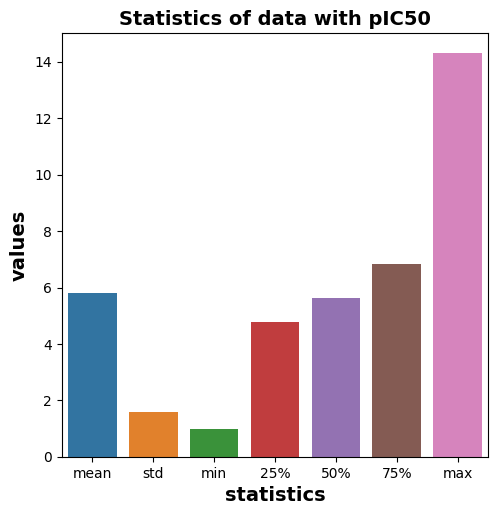

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.barplot( x = dfprime[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].T.index, y = dfprime[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].T["pIC50"])

plt.title("Statistics of data with pIC50", fontsize=14, fontweight='bold')
plt.xlabel('statistics', fontsize=14, fontweight='bold')
plt.ylabel('values', fontsize=14, fontweight='bold')
plt.savefig("pIC50_stat.png")

In [ ]:
df['bioactivity_class01'] = df.bioactivity_class01.astype('category')
df['bioactivity_class'] = df.bioactivity_class.astype('category')

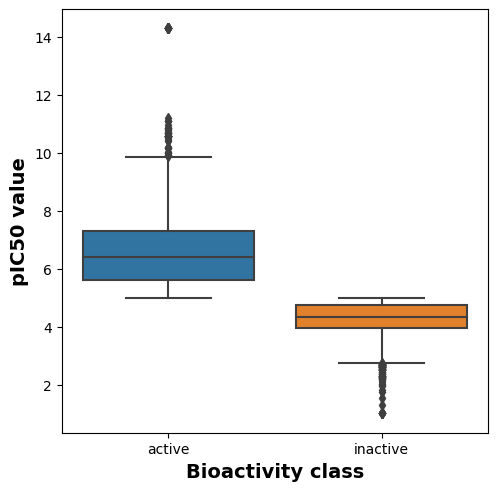

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig("boxplot_classes_pIC50.png")

In [ ]:
df["pIC50"].describe()

count    5823.000000
mean        5.819653
std         1.582961
min         1.000000
25%         4.769551
50%         5.619789
75%         6.832683
max        14.301030
Name: pIC50, dtype: float64

In [ ]:
Q1 = df["pIC50"].quantile(0.25)
Q3 = df["pIC50"].quantile(0.75)
IQR = Q3 - Q1
IQR

2.0631315866300985

In [ ]:
low = Q1- 1.5*IQR
up = Q3+ 1.5*IQR
low, up

(1.674853698676578, 9.927380045196973)

In [ ]:
df = df[(df.pIC50 > low) & (df.pIC50 < up)]
df


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_class,pIC50,bioactivity_class01
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.124939,1
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,7.000000,1
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,inactive,4.301030,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.522879,1
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,6.096910,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,8.590067,1
5819,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,8.621602,1
5820,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,9.387216,1
5821,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,active,9.200659,1


In [ ]:
df = df[(df.pIC50 > 3) & (df.pIC50 < 9.8)]

In [ ]:
df = df.reset_index(drop = True)

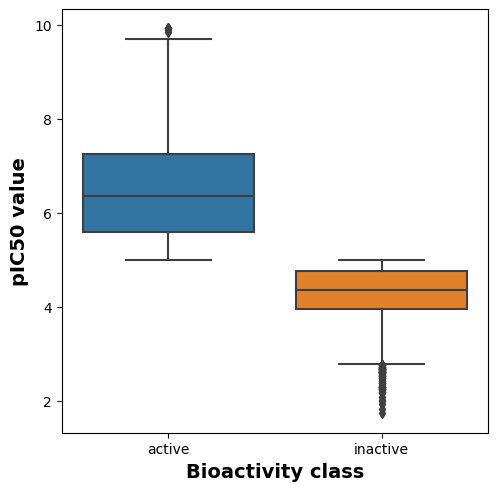

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.savefig("boxplot_classes_pIC50_Noutlayers.png")

In [ ]:
X = df.drop(['bioactivity_class', 'bioactivity_class01', 'pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5751,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5752,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5753,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5754,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = df.drop(['bioactivity_class', 'pIC50'], axis=1)
train

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,bioactivity_class01
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5751,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5752,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5753,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5754,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
Y = df.bioactivity_class01
Y

0       1
1       1
2       0
3       1
4       1
       ..
5751    1
5752    1
5753    1
5754    1
5755    1
Name: bioactivity_class01, Length: 5756, dtype: category
Categories (2, int64): [0, 1]

Text(0, 0.5, 'Frequency')

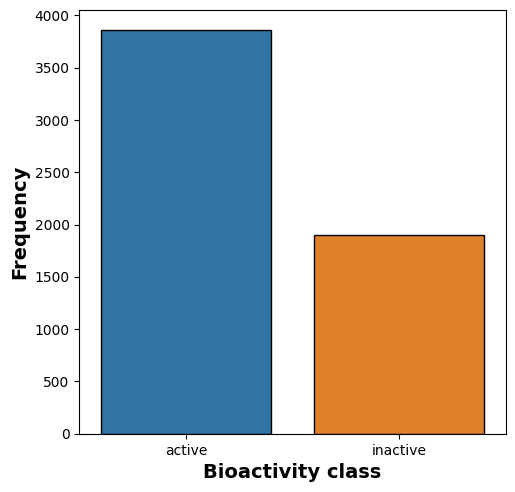

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

In [ ]:
df['bioactivity_class'].value_counts()

active      3857
inactive    1899
Name: bioactivity_class, dtype: int64

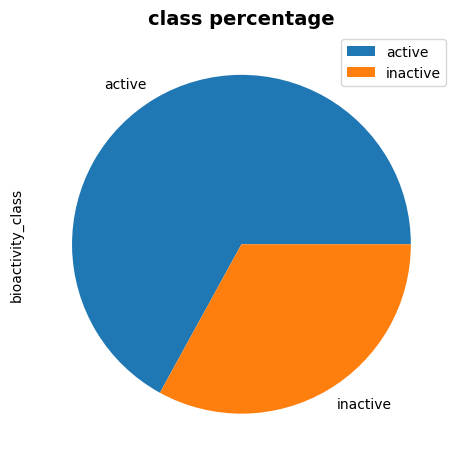

In [ ]:
plt.figure(figsize=(5.5,5.5))
df['bioactivity_class'].value_counts().plot.pie()
plt.title("class percentage", fontsize=14, fontweight='bold')
plt.legend()


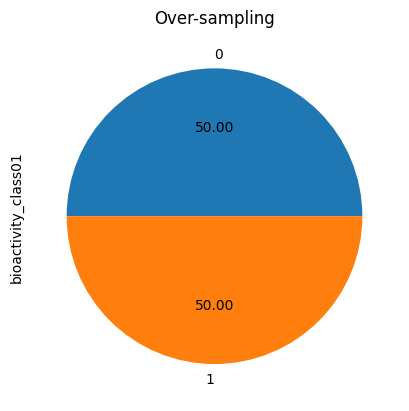

In [ ]:
from imblearn.over_sampling import RandomOverSampler

#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, Y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

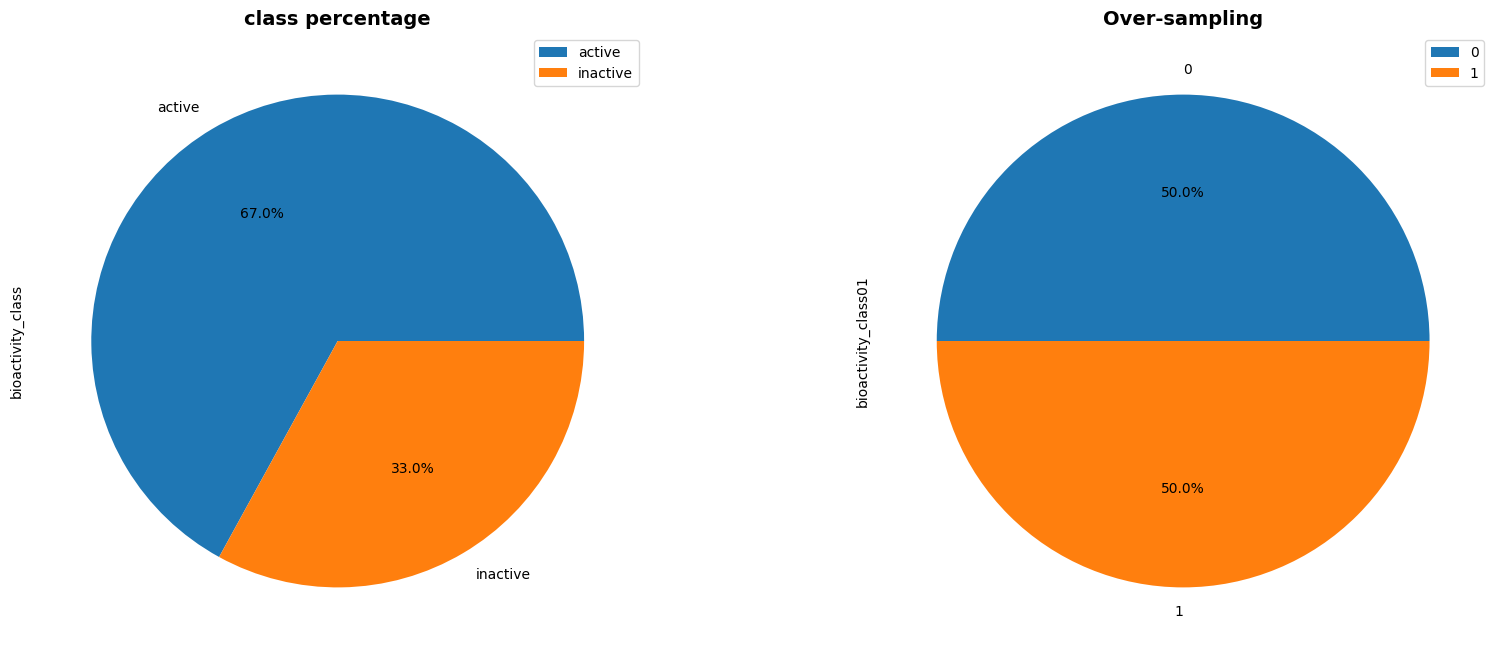

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
df['bioactivity_class'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("class percentage", fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(1,2,2)

ax = y_res.value_counts().plot.pie(autopct='%1.1f%%')
_ = ax.set_title("Over-sampling", fontsize=14, fontweight='bold')
plt.legend()

plt.savefig("Balace.png")

In [ ]:
X = X_res
Y = y_res

In [ ]:
X.shape

(7714, 881)

In [ ]:
Y.shape

(7714,)

In [ ]:
import numpy as np

In [ ]:
type(Y)

pandas.core.series.Series

In [ ]:
Y.shape

(7714,)

In [ ]:
#from sklearn.feature_selection import VarianceThreshold
#selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
#X = selection.fit_transform(X)

In [ ]:
X.shape

(7714, 881)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_train.shape, Y_train.shape

((6171, 881), (6171,))

In [ ]:
X_test.shape, Y_test.shape

((1543, 881), (1543,))

#Machine learning

In [ ]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

from sklearn import set_config

In [ ]:
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier

##ExtraTreeClassifier

In [ ]:
model = ExtraTreeClassifier()
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8736228127025275

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Ytest = Y_test
rounded = Y_pred

# Calculer la matrice de confusion
confusion = confusion_matrix(Ytest, rounded)
print("Matrice de confusion :")
print(confusion)

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(Ytest, rounded)
print("Accuracy score : {:.2f}".format(accuracy))

# Calculer la précision (precision) du modèle
precision = precision_score(Ytest, rounded)
print("Précision : {:.2f}".format(precision))

# Calculer le rappel (recall) du modèle
recall = recall_score(Ytest, rounded)
print("Recall score : {:.2f}".format(recall))

# Calculer la F-mesure (F1-score) du modèle
f1 = f1_score(Ytest, rounded)
print("F-mesure : {:.2f}".format(f1))


Matrice de confusion :
[[691  62]
 [133 657]]
Accuracy score : 0.87
Précision : 0.91
Recall score : 0.83
F-mesure : 0.87


##DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8664938431626701

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Ytest = Y_test
rounded = Y_pred

# Calculer la matrice de confusion
confusion = confusion_matrix(Ytest, rounded)
print("Matrice de confusion :")
print(confusion)

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(Ytest, rounded)
print("Accuracy score : {:.2f}".format(accuracy))

# Calculer la précision (precision) du modèle
precision = precision_score(Ytest, rounded)
print("Précision : {:.2f}".format(precision))

# Calculer le rappel (recall) du modèle
recall = recall_score(Ytest, rounded)
print("Recall score : {:.2f}".format(recall))

# Calculer la F-mesure (F1-score) du modèle
f1 = f1_score(Ytest, rounded)
print("F-mesure : {:.2f}".format(f1))


Matrice de confusion :
[[688  65]
 [141 649]]
Accuracy score : 0.87
Précision : 0.91
Recall score : 0.82
F-mesure : 0.86


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001, .0001],
              "min_samples_split": [10, 20, 40],

              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

KeyboardInterrupt: ignored

In [ ]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.0001, max_features='auto',
                       max_leaf_nodes=100, min_samples_leaf=20,
                       min_samples_split=10, random_state=1024)

In [ ]:
tree_clas = DecisionTreeClassifier(ccp_alpha=0.0001, max_features='auto',
                       max_leaf_nodes=100, min_samples_leaf=20,
                       min_samples_split=10, random_state=1024)
tree_clas.fit(X_train, Y_train)
Y_predict = tree_clas.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Ytest = Y_test
rounded = Y_pred

# Calculer la matrice de confusion
confusion = confusion_matrix(Ytest, rounded)
print("Matrice de confusion :")
print(confusion)

# Calculer l'exactitude (accuracy) du modèle
accuracy = accuracy_score(Ytest, rounded)
print("Accuracy score : {:.2f}".format(accuracy))

# Calculer la précision (precision) du modèle
precision = precision_score(Ytest, rounded)
print("Précision : {:.2f}".format(precision))

# Calculer le rappel (recall) du modèle
recall = recall_score(Ytest, rounded)
print("Recall score : {:.2f}".format(recall))

# Calculer la F-mesure (F1-score) du modèle
f1 = f1_score(Ytest, rounded)
print("F-mesure : {:.2f}".format(f1))


Matrice de confusion :
[[688  65]
 [141 649]]
Accuracy score : 0.87
Précision : 0.91
Recall score : 0.82
F-mesure : 0.86
